In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
label=data['Outcome']
data = data.drop('Outcome', axis=1)
print(data.shape)

(768, 9)
(768, 8)


In [4]:
stdsc = StandardScaler()
data_std = stdsc.fit_transform(data)
display(data_std)
print(data_std.shape)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

(768, 8)


In [5]:
covariance_matrix = np.matmul(data_std.T, data_std)
display(covariance_matrix)
print(covariance_matrix.shape)

array([[768.        ,  99.42425971, 108.50455865, -62.72392278,
        -56.47458382,  13.58061368, -25.74541284, 418.05406341],
       [ 99.42425971, 768.        , 117.18880248,  44.02782009,
        254.48226042, 169.78258134, 105.47504627, 202.37899763],
       [108.50455865, 117.18880248, 768.        , 159.26057349,
         68.30083459, 216.42646184,  31.69148001, 183.95746285],
       [-62.72392278,  44.02782009, 159.26057349, 768.        ,
        335.44901385, 301.49622079, 141.25637603, -87.5291615 ],
       [-56.47458382, 254.48226042,  68.30083459, 335.44901385,
        768.        , 151.95575539, 142.1344736 , -32.38114924],
       [ 13.58061368, 169.78258134, 216.42646184, 301.49622079,
        151.95575539, 768.        , 108.01685955,  27.83375623],
       [-25.74541284, 105.47504627,  31.69148001, 141.25637603,
        142.1344736 , 108.01685955, 768.        ,  25.77508795],
       [418.05406341, 202.37899763, 183.95746285, -87.5291615 ,
        -32.38114924,  27.8337562

(8, 8)


In [6]:
values, vectors = eigh(covariance_matrix)
print(values)


[ 310.62685278  322.41882601  524.25860194  585.4804881   672.40630564
  790.75573953 1329.569388   1608.48379798]


In [7]:
print(vectors)
print(vectors.shape)

[[ 0.11784098  0.58879003 -0.19359817  0.47560573  0.08069115  0.01308692
  -0.59378583 -0.1284321 ]
 [ 0.45035526  0.06015291 -0.09416176 -0.46632804 -0.40432871 -0.46792282
  -0.17402908 -0.39308257]
 [-0.01129554  0.19211793  0.6341159  -0.32795306  0.05598649  0.53549442
  -0.18389207 -0.36000261]
 [ 0.5662838  -0.28221253 -0.00958944  0.48786206  0.03797608  0.2376738
   0.33196534 -0.43982428]
 [-0.54862138  0.13200992  0.27065061  0.34693481 -0.34994376 -0.33670893
   0.25078106 -0.43502617]
 [-0.34151764  0.03536644 -0.68537218 -0.25320376  0.05364595  0.36186463
   0.1009598  -0.45194134]
 [-0.00825873  0.08609107  0.08578409 -0.11981049  0.8336801  -0.43318905
   0.122069   -0.27061144]
 [-0.21166198 -0.71208542  0.03335717  0.10928996  0.0712006  -0.07524755
  -0.62058853 -0.19802707]]
(8, 8)


In [8]:
values, vectors = eigh(covariance_matrix, eigvals = (6,7))
print(values)
print(vectors)

[1329.569388   1608.48379798]
[[-0.59378583 -0.1284321 ]
 [-0.17402908 -0.39308257]
 [-0.18389207 -0.36000261]
 [ 0.33196534 -0.43982428]
 [ 0.25078106 -0.43502617]
 [ 0.1009598  -0.45194134]
 [ 0.122069   -0.27061144]
 [-0.62058853 -0.19802707]]


<ipython-input-8-455282dcc421>:1: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covariance_matrix, eigvals = (6,7))


In [9]:
new_data = np.matmul(data_std, vectors)
print(new_data.shape)
display(new_data)

(768, 2)


array([[-1.23489499, -1.06850273],
       [ 0.73385167,  1.12168331],
       [-1.59587594,  0.39647671],
       ...,
       [-0.09706503,  0.28347525],
       [-0.83706234,  1.06032431],
       [ 1.15175485,  0.83989172]])

In [13]:
#PCA USING SCIKIT LEARN
pca_data = PCA()
pca_data.n_components = 8
pca_data_ = pca_data.fit_transform(data)
print(pca_data.explained_variance_)
print(pca_data.explained_variance_ratio_)

[1.34565730e+04 9.32760132e+02 3.90577831e+02 1.98182691e+02
 1.12689115e+02 4.58294431e+01 7.76070899e+00 1.02871018e-01]
[8.88546635e-01 6.15907837e-02 2.57901189e-02 1.30861374e-02
 7.44093864e-03 3.02614919e-03 5.12444875e-04 6.79264301e-06]


In [46]:
y=np.cumsum(pca_data.explained_variance_ratio_*100)
x=[0,1,2,3,4,5,6,7,8]
y=y[::-1]
y = np.append(y,0.0)
y=y[::-1]
print(y)
y=np.round(y,2)
print(y)

[  0.          88.85466346  95.01374183  97.59275372  98.90136747
  99.64546133  99.94807625  99.99932074 100.        ]
[  0.    88.85  95.01  97.59  98.9   99.65  99.95 100.   100.  ]


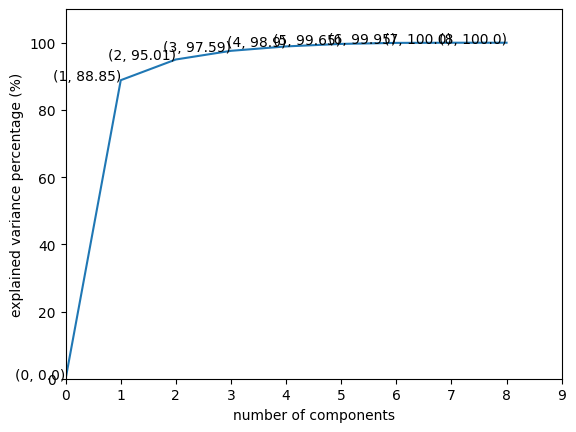

In [47]:
sns.lineplot(x=x,y=y)
plt.xlim(0,9)
plt.ylim(0,110)
plt.xlabel('number of components')
plt.ylabel('explained variance percentage (%)')
for i in range(9):
    plt.text(x[i], y[i], f'({x[i]}, {y[i]})', ha='right')

(768, 2)


<Axes: >

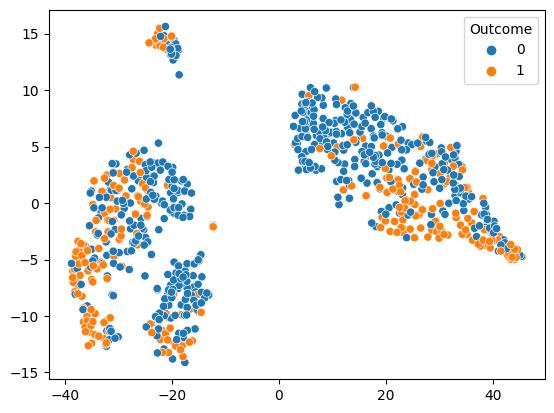

In [58]:
#TSNE
from sklearn.manifold import TSNE
tsne_ = TSNE(n_components=2, random_state = 42,perplexity=45, n_iter=1000)
tsne_data = tsne_.fit_transform(data)
print(tsne_data.shape)

tsne_data
sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1], hue = label)